
<h1> Ensemble Techniques - R3 - Project1 </h1>


###  Diagnosis Parkinson’s Disease (PD) Using Ensemble Techniques

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ (Links to an external site.)Links to an external site. The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

1. Use a Python notebook & Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

#### Parkinson’s Disease Dataset FieldDetails:
<br>
<table>
    <tr><td ><b>Abbreviations</b> </td><td ><b> Feature description</b> </td></tr><tr><td >MDVP:F0 (Hz)</td><td > Average vocal fundamental frequency</td></tr><tr><td >MDVP:Fhi (Hz)</td><td > Maximum vocal fundamental frequency</td></tr><tr><td >MDVP:Flo (Hz)</td><td > Minimum vocal fundamental frequency</td></tr><tr><td >MDVP:Jitter(%)</td><td > MDVP jitter in percentage</td></tr><tr><td >MDVP:Jitter(Abs)</td><td > MDVP absolute jitter in ms</td></tr><tr><td >MDVP:RAP</td><td > MDVP relative amplitude perturbation</td></tr><tr><td >MDVP:PPQ</td><td > MDVP five-point period perturbation quotient</td></tr><tr><td >Jitter:DDP</td><td > Average absolute difference of differences between jitter cycles</td></tr><tr><td >MDVP:Shimmer</td><td > MDVP local shimmer</td></tr><tr><td >MDVP:Shimmer(dB)</td><td > MDVP local shimmer in dB</td></tr><tr><td >Shimmer:APQ3</td><td > Three-point amplitude perturbation quotient</td></tr><tr><td >Shimmer:APQ5</td><td > Five-point amplitude perturbation quotient</td></tr><tr><td >MDVP:APQ11</td><td > MDVP 11-point amplitude perturbation quotient</td></tr><tr><td >Shimmer:DDA</td><td > Average absolute differences between the amplitudes of consecutive periods</td></tr><tr><td >NHR</td><td > Noise-to-harmonics ratio</td></tr><tr><td >HNR</td><td > Harmonics-to-noise ratio</td></tr><tr><td >RPDE</td><td > Recurrence period density entropy measure</td></tr><tr><td >D2</td><td > Correlation dimension</td></tr><tr><td >DFA</td><td > Signal fractal scaling exponent of detrended fluctuation analysis</td></tr><tr><td >Spread1</td><td > Two nonlinear measures of fundamental</td></tr><tr><td >Spread2</td><td > Frequency variation</td></tr><tr><td >PPE</td><td > Pitch period entropy</td></tr><tr class="table-tr"><td colspan="2"><hr class="tbody-hr" /></td></tr></table>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve

In [3]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [4]:
import warnings 
warnings.filterwarnings('ignore')

## Question

### 1. Use a Python notebook & Load the dataset

In [5]:
#Read parkinsons data from parkinsons.data  file
parkinsons_df = pd.read_csv("parkinsons.data")

In [6]:
#Check top 5 rows in the bankloan dataframe
parkinsons_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
#Get shape of bankLoan_df
parkinsons_df.shape

(195, 24)

###  2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [8]:
#Get Parkinson’s Disease dataset Row & Column information
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [9]:
#Get Parkinson’s Disease dataset Describtion. so, that we know mean,std,min, 25%, 50%, 75%,and Max value of each fields.

parkinsons_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [12]:
#Get the Target/Status column data distribution information
parkinsons_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### Dataset Observation :

1. In Parkinson’s Disease dataset we have around 195 Rows & 24 Columns.
2. There are 2 Categorical variable (Status & name) and all others are Numerical-Continusous Variables.
2. Dependent/Target column is <b>Status</b> which is categorical column (0,1). 1 means Parkinson's and 0 mean Healthy.
3. Look like there is no missing value in the given dataset.
4. In the given dataset out-off 195, there are 147 people are Parkinson's and 48 people are Healthy. So, in the given dataset 75% people having  Parkinson's.

### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

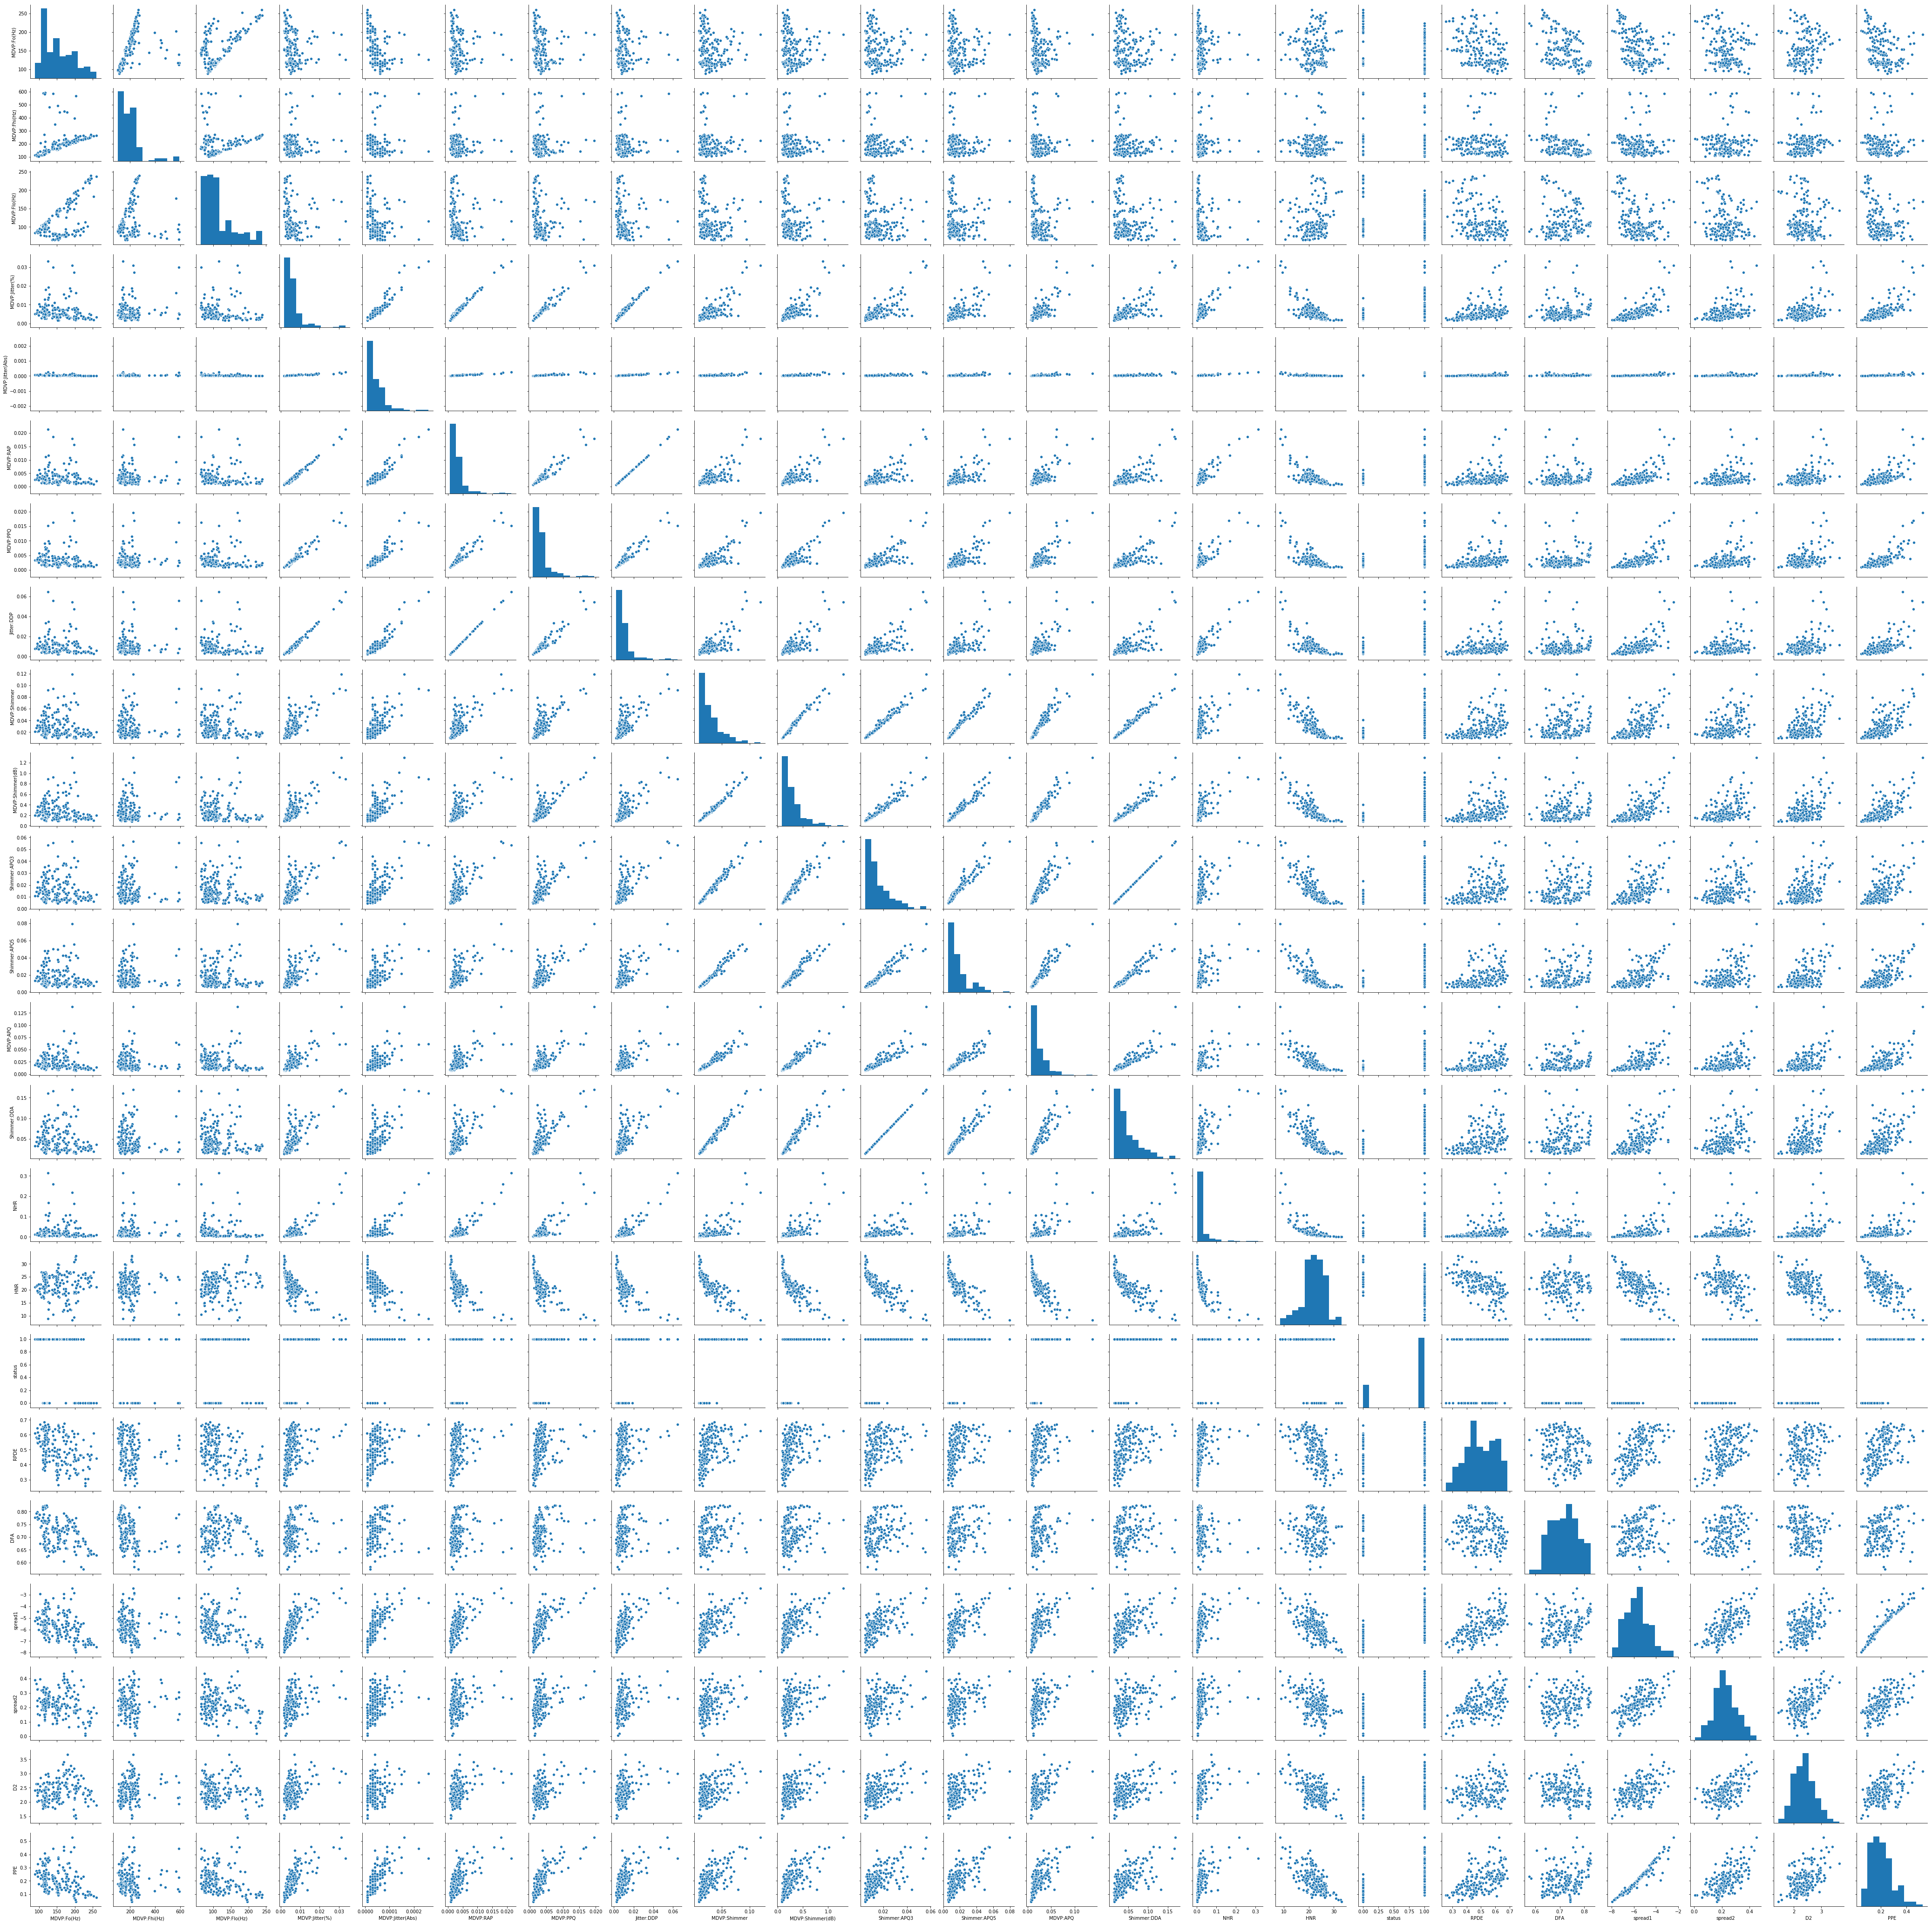

In [53]:
#First, let's look data distribution using pairplot matrix.it allows to quickly observe the relationship between every variable in matrix form.
sns.pairplot(parkinsons_df)

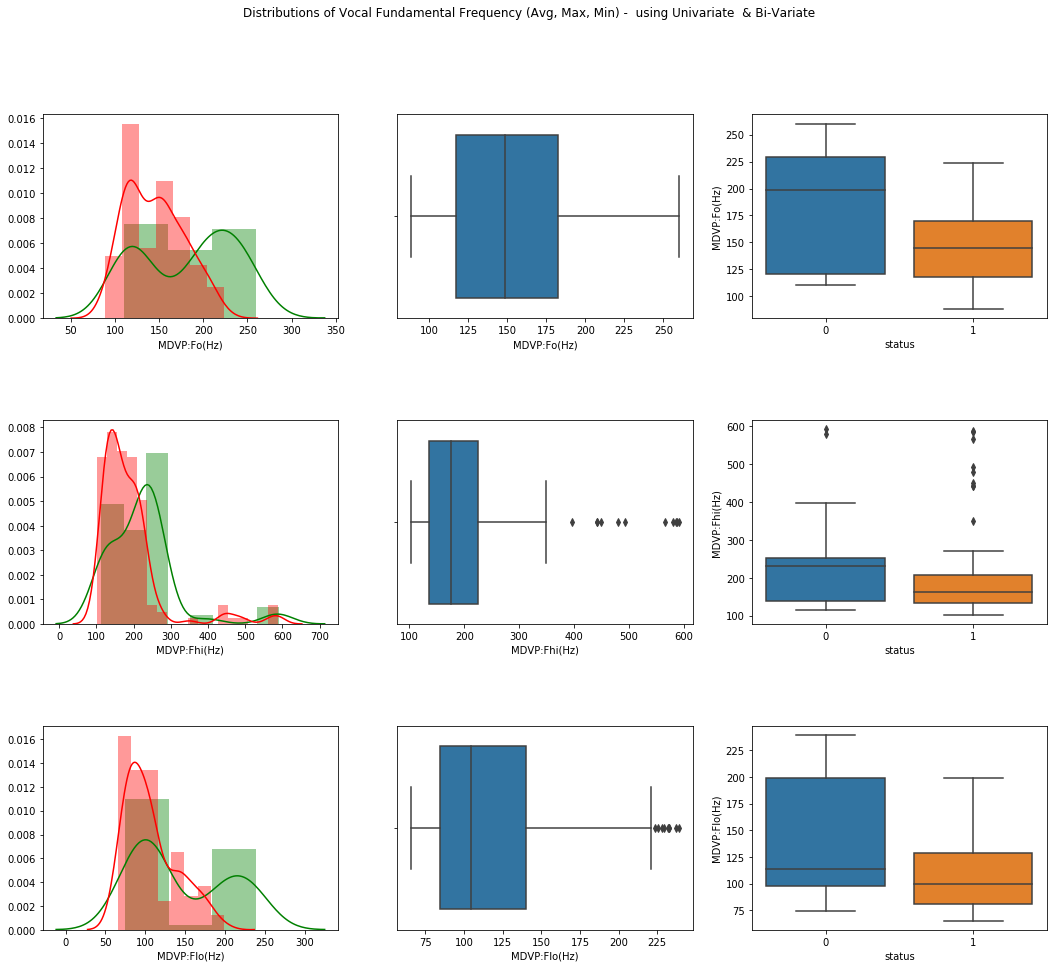

In [34]:
#Distributions of Vocal Fundamental Frequency (Avg, Max, Min) using Univariate  & Bi-Variate
a4_dims = (18, 15)
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Vocal Fundamental Frequency (Avg, Max, Min) -  using Univariate  & Bi-Variate')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Fo(Hz)'], color = 'green',ax=ax[0][0]);
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Fo(Hz)'], color = 'red',ax=ax[0][0]);
sns.boxplot(data=parkinsons_df, x="MDVP:Fo(Hz)",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Fo(Hz)",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Fhi(Hz)'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Fhi(Hz)'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Fhi(Hz)",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Fhi(Hz)",x="status",ax=ax[1][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Flo(Hz)'], color = 'green',ax=ax[2][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Flo(Hz)'], color = 'red',ax=ax[2][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Flo(Hz)",ax=ax[2][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Flo(Hz)",x="status",ax=ax[2][2]);

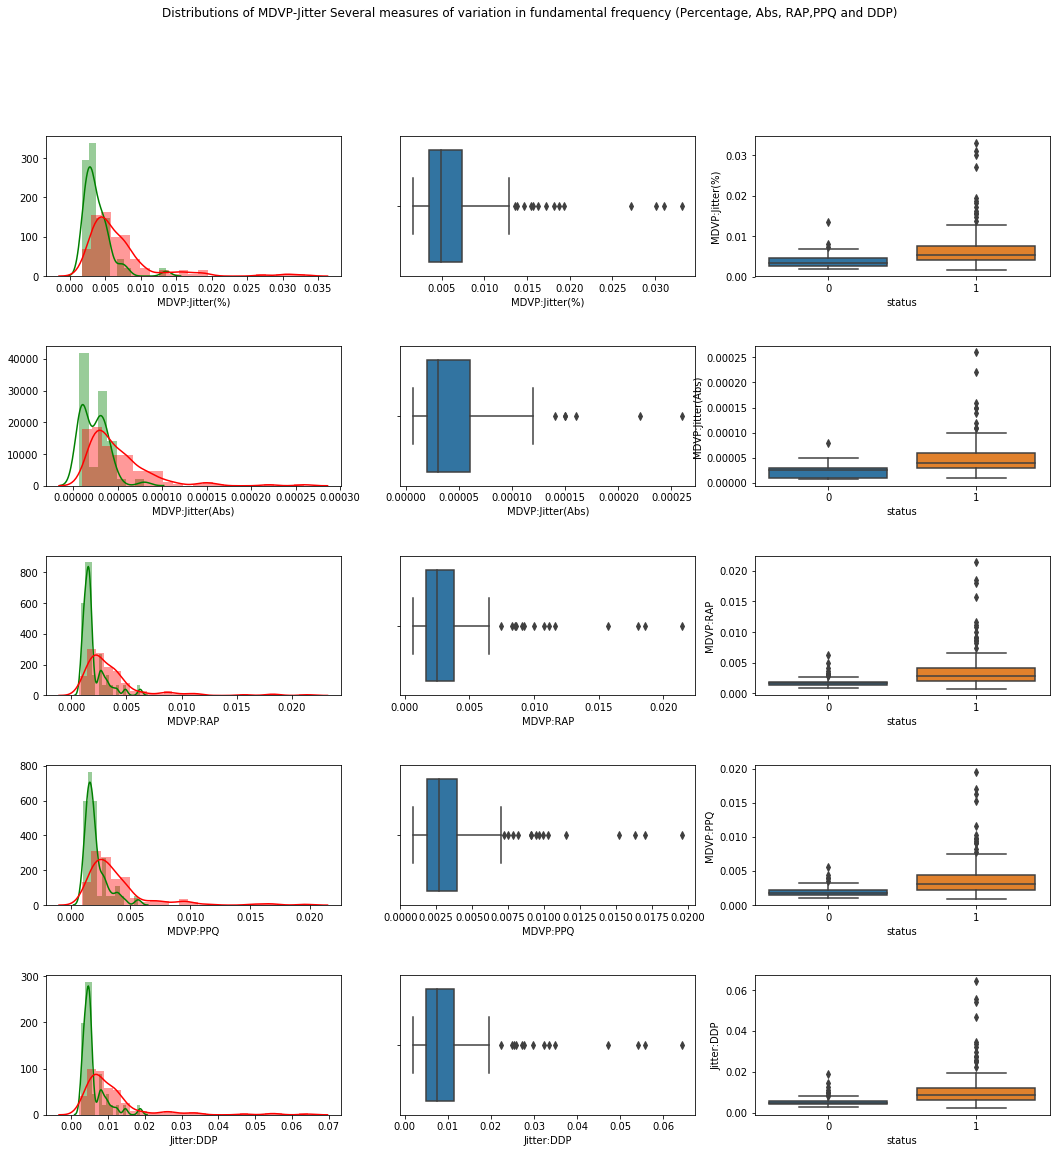

In [40]:
#Distributions of MDVP-Jitter Several measures of variation in fundamental frequency (Percentage, Abs, RAP,PPQ and DDP)
a4_dims = (18, 18)
fig, ax = plt.subplots(nrows=5, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of MDVP-Jitter Several measures of variation in fundamental frequency (Percentage, Abs, RAP,PPQ and DDP) ')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Jitter(%)'], color = 'green',ax=ax[0][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Jitter(%)'], color = 'red',ax=ax[0][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Jitter(%)",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Jitter(%)",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Jitter(Abs)'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Jitter(Abs)'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Jitter(Abs)",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Jitter(Abs)",x="status",ax=ax[1][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:RAP'], color = 'green',ax=ax[2][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:RAP'], color = 'red',ax=ax[2][0])
sns.boxplot(data=parkinsons_df, x="MDVP:RAP",ax=ax[2][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:RAP",x="status",ax=ax[2][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:PPQ'], color = 'green',ax=ax[3][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:PPQ'], color = 'red',ax=ax[3][0])
sns.boxplot(data=parkinsons_df, x="MDVP:PPQ",ax=ax[3][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:PPQ",x="status",ax=ax[3][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['Jitter:DDP'], color = 'green',ax=ax[4][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['Jitter:DDP'], color = 'red',ax=ax[4][0])
sns.boxplot(data=parkinsons_df, x="Jitter:DDP",ax=ax[4][1]);
sns.boxplot(data=parkinsons_df, y="Jitter:DDP",x="status",ax=ax[4][2]);

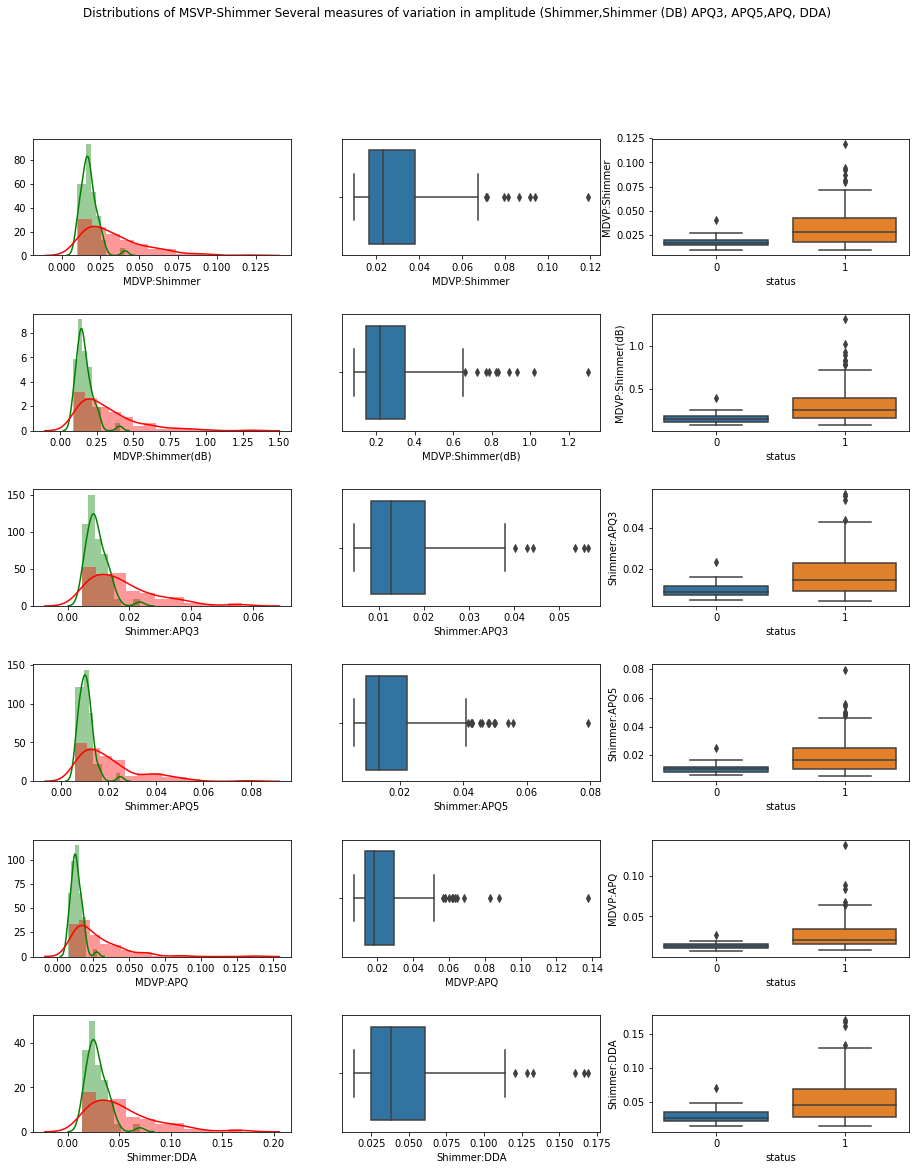

In [45]:
#Distributions of MSVP-Shimmer Several measures of variation in amplitude (Shimmer,Shimmer (DB) APQ3, APQ5,APQ, DDA) )
a4_dims = (15.7, 18.27)
fig, ax = plt.subplots(nrows=6, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of MSVP-Shimmer Several measures of variation in amplitude (Shimmer,Shimmer (DB) APQ3, APQ5,APQ, DDA)')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Shimmer'], color = 'green',ax=ax[0][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Shimmer'], color = 'red',ax=ax[0][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Shimmer",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Shimmer",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:Shimmer(dB)'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:Shimmer(dB)'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="MDVP:Shimmer(dB)",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:Shimmer(dB)",x="status",ax=ax[1][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['Shimmer:APQ3'], color = 'green',ax=ax[2][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['Shimmer:APQ3'], color = 'red',ax=ax[2][0])
sns.boxplot(data=parkinsons_df, x="Shimmer:APQ3",ax=ax[2][1]);
sns.boxplot(data=parkinsons_df, y="Shimmer:APQ3",x="status",ax=ax[2][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['Shimmer:APQ5'], color = 'green',ax=ax[3][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['Shimmer:APQ5'], color = 'red',ax=ax[3][0])
sns.boxplot(data=parkinsons_df, x="Shimmer:APQ5",ax=ax[3][1]);
sns.boxplot(data=parkinsons_df, y="Shimmer:APQ5",x="status",ax=ax[3][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['MDVP:APQ'], color = 'green',ax=ax[4][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['MDVP:APQ'], color = 'red',ax=ax[4][0])
sns.boxplot(data=parkinsons_df, x="MDVP:APQ",ax=ax[4][1]);
sns.boxplot(data=parkinsons_df, y="MDVP:APQ",x="status",ax=ax[4][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['Shimmer:DDA'], color = 'green',ax=ax[5][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['Shimmer:DDA'], color = 'red',ax=ax[5][0])
sns.boxplot(data=parkinsons_df, x="Shimmer:DDA",ax=ax[5][1]);
sns.boxplot(data=parkinsons_df, y="Shimmer:DDA",x="status",ax=ax[5][2]);

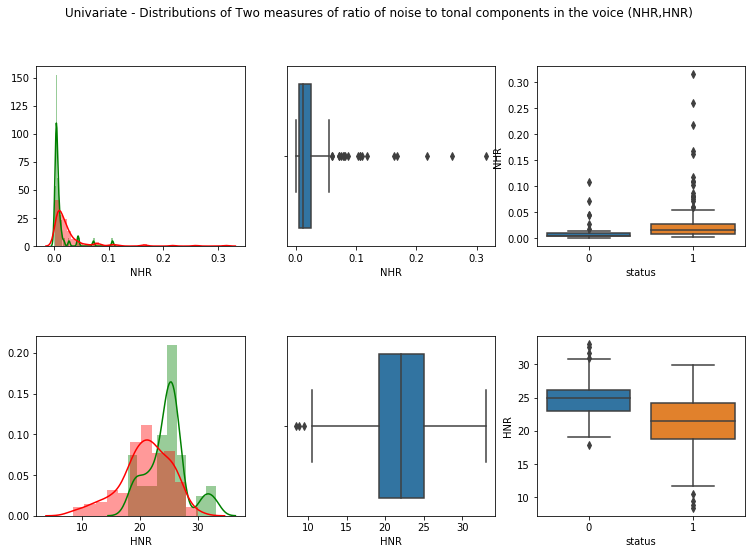

In [46]:
#Distributions of Two measures of ratio of noise to tonal components in the voice (NHR,HNR)
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Univariate - Distributions of Two measures of ratio of noise to tonal components in the voice (NHR,HNR)')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['NHR'], color = 'green',ax=ax[0][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['NHR'], color = 'red',ax=ax[0][0])
sns.boxplot(data=parkinsons_df, x="NHR",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="NHR",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['HNR'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['HNR'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="HNR",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="HNR",x="status",ax=ax[1][2]);



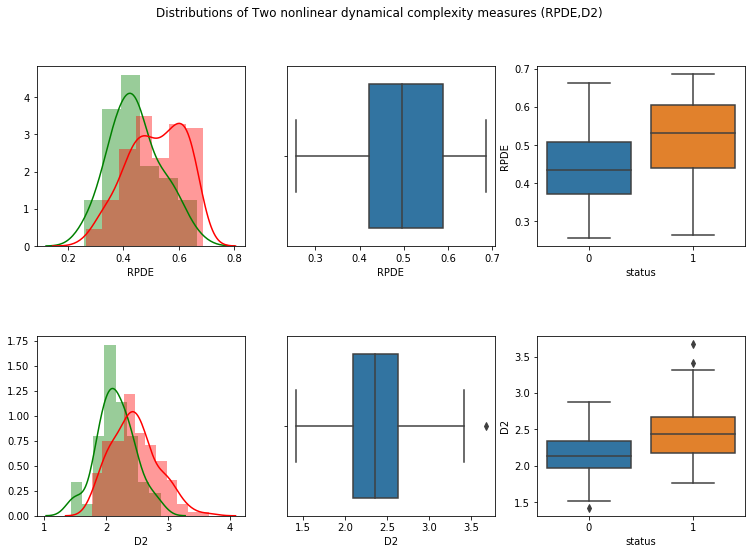

In [43]:
#Distributions of Two nonlinear dynamical complexity measures (RPDE,D2)
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Two nonlinear dynamical complexity measures (RPDE,D2)')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['RPDE'], color = 'green',ax=ax[0][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['RPDE'], color = 'red',ax=ax[0][0])
sns.boxplot(data=parkinsons_df, x="RPDE",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="RPDE",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['D2'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['D2'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="D2",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="D2",x="status",ax=ax[1][2]);

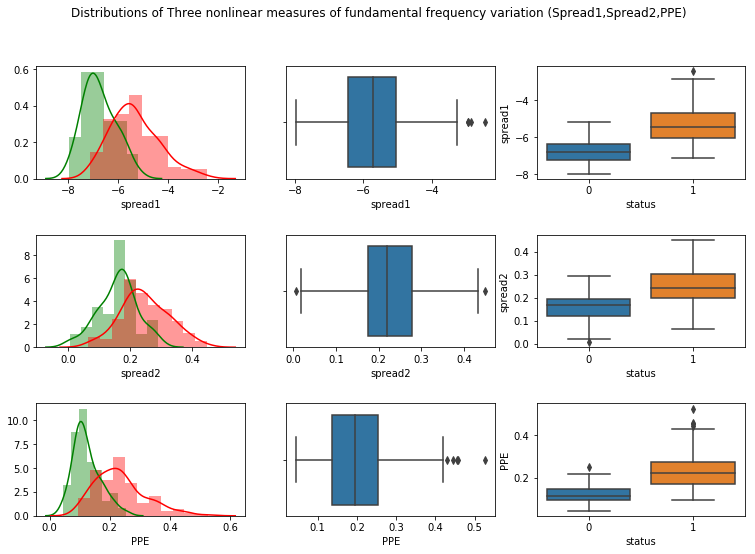

In [42]:
#Distributions of Three nonlinear measures of fundamental frequency variation (Spread1,Spread2,PPE) )
a4_dims = (12.7, 8.27)
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Three nonlinear measures of fundamental frequency variation (Spread1,Spread2,PPE)')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['spread1'], color = 'green',ax=ax[0][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['spread1'], color = 'red',ax=ax[0][0])
sns.boxplot(data=parkinsons_df, x="spread1",ax=ax[0][1]);
sns.boxplot(data=parkinsons_df, y="spread1",x="status",ax=ax[0][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['spread2'], color = 'green',ax=ax[1][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['spread2'], color = 'red',ax=ax[1][0])
sns.boxplot(data=parkinsons_df, x="spread2",ax=ax[1][1]);
sns.boxplot(data=parkinsons_df, y="spread2",x="status",ax=ax[1][2]);

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['PPE'], color = 'green',ax=ax[2][0])
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['PPE'], color = 'red',ax=ax[2][0])
sns.boxplot(data=parkinsons_df, x="PPE",ax=ax[2][1]);
sns.boxplot(data=parkinsons_df, y="PPE",x="status",ax=ax[2][2]);

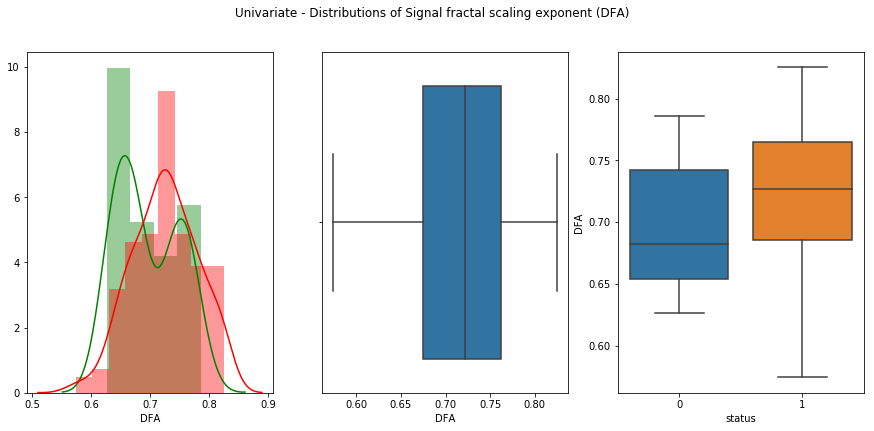

In [41]:
#Distributions of Signal fractal scaling exponent (DFA) using Univariate & BiVariate
a4_dims = (15, 6.27)
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=a4_dims)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Signal fractal scaling exponent (DFA)')

sns.distplot( parkinsons_df[parkinsons_df["status"] == 0]['DFA'], color = 'green',ax=ax[0]);
sns.distplot( parkinsons_df[parkinsons_df["status"] == 1]['DFA'], color = 'red',ax=ax[0])
sns.boxplot(data=parkinsons_df, x="DFA",ax=ax[1]);
sns.boxplot(data=parkinsons_df, y="DFA",x="status",ax=ax[2]);


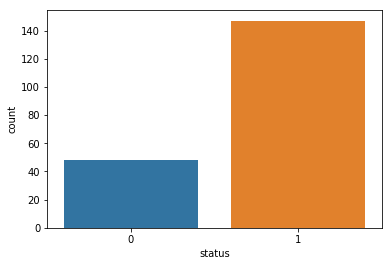

In [49]:
# Status variable distribution in the Parkinson’s Disease dataset.
plot = sns.countplot(x = "status", data = parkinsons_df)
plot.set_xticklabels(plot.get_xticklabels());
#In the given dataset out-off 195, there are 147 people are Parkinson's and 48 people are Healthy. 
#So, in the given dataset 75% people having Parkinson's.

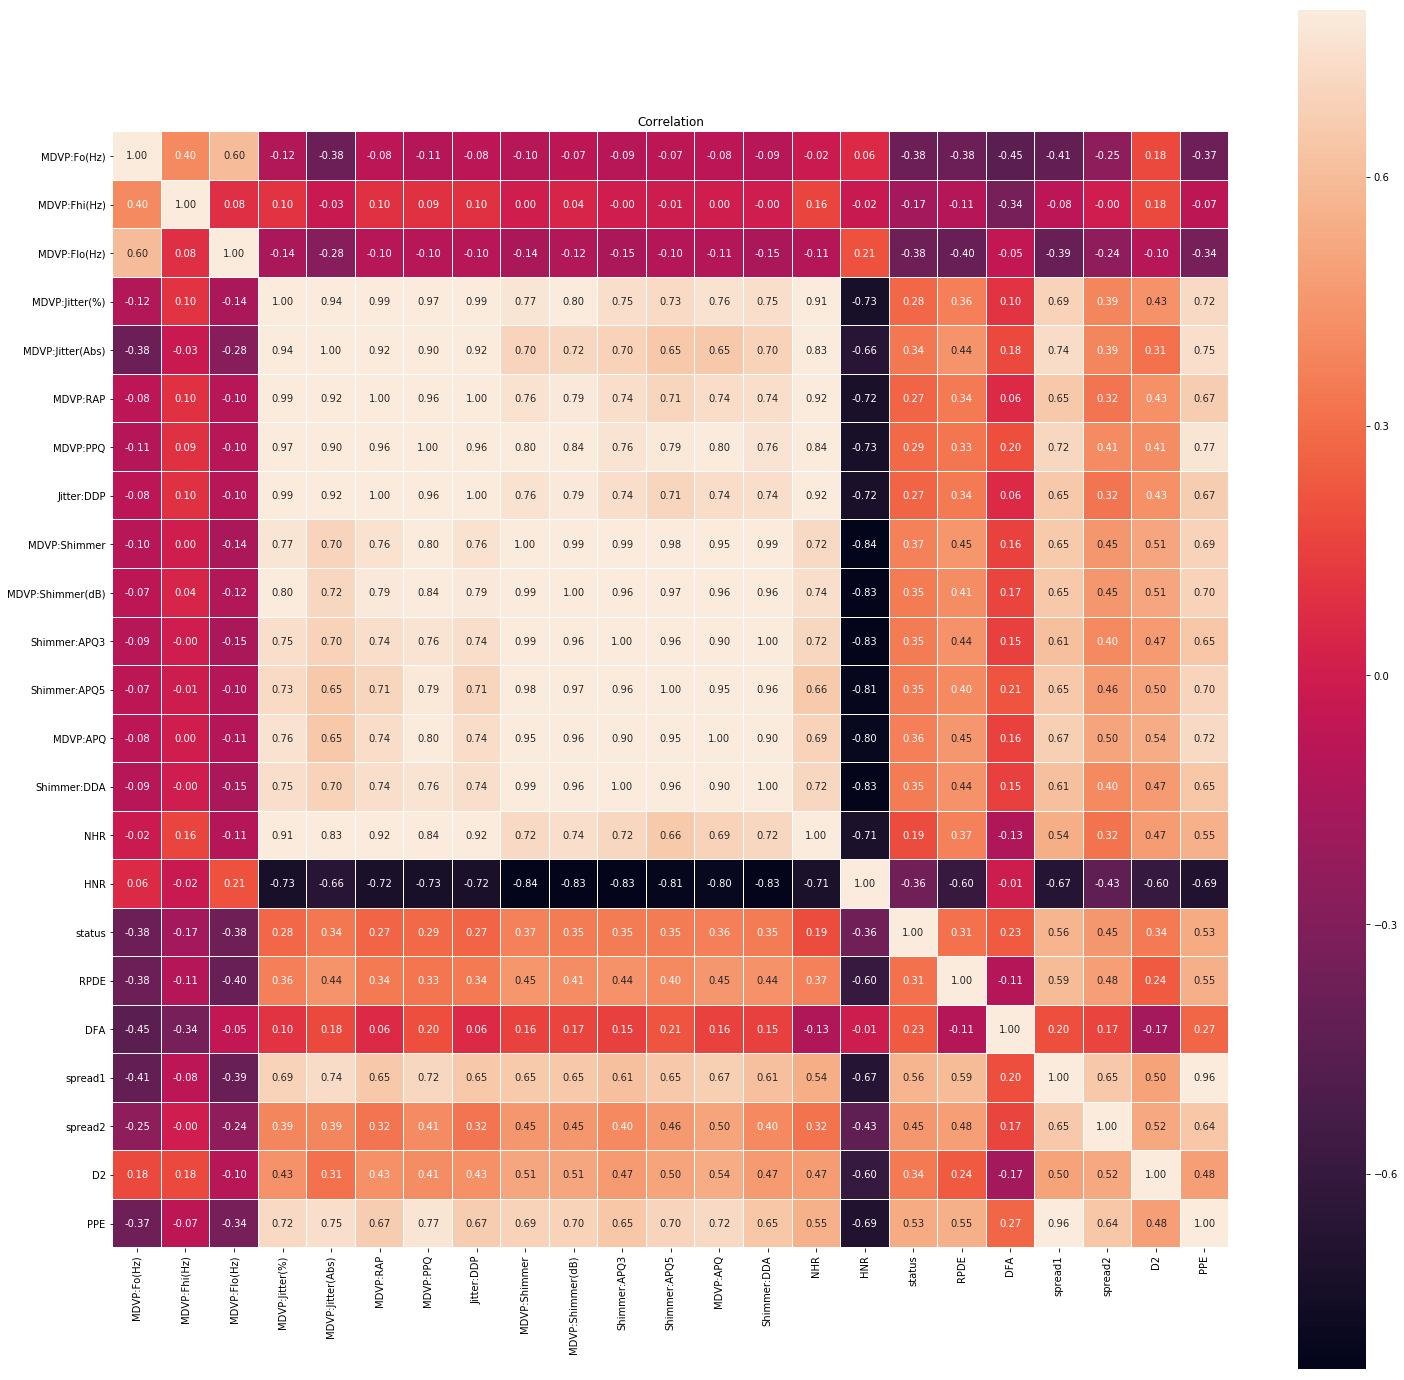

In [48]:
# Correlation with Heatmap. This help us to know each variable liner correlation with each other in a matrix form
plt.figure(figsize=(25, 25))
ax = sns.heatmap(parkinsons_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

## Observation :

         
1. Vocal Fundamental Frequency (Avg, Max, Min) variable are postively skewed
2. MDVP-Jitter Several measures of variation in fundamental frequency (Percentage, Abs, RAP,PPQ and DDP) variables are postively skewed. And also each variable are highly postively correlated as per correlation matrix.
3. MSVP-Shimmer Several measures of variation in amplitude (Shimmer,Shimmer (DB) APQ3, APQ5,APQ, DDA) variables are postively skewed. And also each variable are highly postively correlated as per correlation matrix.
4. And also Jitter & Shimmer variables are postively correlated.
5. Variable NHR (Noise-to-harmonics ratio) are more postively skewed and it has few outlier.
6. Variable HNR (Harmonics-to-noise ratio) which is the ratio of noise to tonal components in the voice. This variablea are Negatively Skewed.
7. Variable RPDE (Recurrence period density entropy measure) and D2 (Correlation dimension) are normally distributed.
8. Variable Spread1 & Spread 2 are almost normally distributed with status. 

9. PPE is postively skewed and if PPE value is above 0.1  then more are Parkinson's in the dataset.
10. Variable DFA (Distributions of Signal fractal scaling exponent) also almost normally distributed.


## 4.Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [220]:
# Get independent variable in X. Drop Status & name column from the dataset. 
#Since Status is Target variable & name column not required to buld the model
X = parkinsons_df.drop(["status","name"], axis=1)
# Get Target variable in y
y = parkinsons_df["status"]

In [221]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [222]:
print("Parkinsons Train Data Shape : {0}".format(X_train.shape))
print("Parkinsons Test Data Shape : {0}".format(X_test.shape))
print("Parkinsons Full Data Shape : {0}".format(X.shape))

Parkinsons Train Data Shape : (136, 22)
Parkinsons Test Data Shape : (59, 22)
Parkinsons Full Data Shape : (195, 22)


## 5.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [229]:
DT_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [230]:
dt_ypred=DT_model.predict(X_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,dt_ypred).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

DT_UnoptimalTestResult_data=[TN,FP,FN,TP,accuracy_score(y_test, dt_ypred), 
                   recall_score(y_test, dt_ypred), 
                   precision_score(y_test, dt_ypred),
                   f1_score(y_test, dt_ypred)]

model_Result["DT_UnOptimal"]=DT_UnoptimalTestResult_data

print("Decision Tree Classifier Metrics : \n\n {0}\n".format(model_Result))

Decision Tree Classifier Metrics : 

                 DT_UnOptimal
TrueNegatives      11.000000
FalsePositives      1.000000
FalseNegatives      6.000000
TruePositives      41.000000
Accuracy            0.881356
Recall              0.872340
Precision           0.976190
F1_Score            0.921348



In [231]:
# Crosstab b/w Actual Result & Predicted Result
pd.crosstab(y_test, dt_ypred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,11,1
1,6,41


In [232]:
#Same with Confusion Matrix
cm=metrics.confusion_matrix(y_test,dt_ypred)
print("Confusion Matrix : \n {0}".format(cm))

Confusion Matrix : 
 [[11  1]
 [ 6 41]]


### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [233]:
#Perform Grid Search Method to find the optimal max_depth size, min_samples_leaf
#identify hyper paramater
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,15),'min_samples_leaf' :np.arange(1,15),'criterion' : ['entropy','gini']}
DT_GS=GridSearchCV(DT_model,parameter,cv=3)
DT_GS.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [234]:
DT_GS_best_Param=DT_GS.best_params_
print("criterion : {0}".format(DT_GS_best_Param["criterion"]))
print("max_depth : {0}".format(DT_GS_best_Param["max_depth"]))
print("min_samples_leaf : {0}".format(DT_GS_best_Param["min_samples_leaf"]))


criterion : entropy
max_depth : 5
min_samples_leaf : 1


In [236]:
#Decision Tree Classifier model with Optimal parameter from GridSearchCV
DT_model2=DecisionTreeClassifier(criterion=DT_GS_best_Param["criterion"],
                                 max_depth=DT_GS_best_Param["max_depth"],
                                 min_samples_leaf=DT_GS_best_Param["min_samples_leaf"],
                                 random_state=0)
DT_model2.fit(X_train,y_train)
DT_ypred2=DT_model2.predict(X_test)


#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,DT_ypred2).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

DT_OptimalTestResult_data=[TN,FP,FN,TP,accuracy_score(y_test, DT_ypred2), 
                   recall_score(y_test, DT_ypred2), 
                   precision_score(y_test, DT_ypred2),
                   f1_score(y_test, DT_ypred2)]

model_Result["DT_Optimal"]=DT_OptimalTestResult_data

print("Decision Tree Classifier Optimal Metrics : \n\n {0}\n".format(model_Result))

Decision Tree Classifier Optimal Metrics : 

                 DT_Optimal
TrueNegatives    11.000000
FalsePositives    1.000000
FalseNegatives    6.000000
TruePositives    41.000000
Accuracy          0.881356
Recall            0.872340
Precision         0.976190
F1_Score          0.921348



In [237]:
#Consolidated result metrics data for UnOptimal & Optimal Decision Tree Classifier Model

Con_model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])
Con_model_Result["DT_Unoptimal"]=DT_UnoptimalTestResult_data
Con_model_Result["DT_Optimal"]=DT_OptimalTestResult_data

Con_model_Result

,DT_Unoptimal,DT_Optimal
TrueNegatives,11.000000,11.000000
FalsePositives,1.000000,1.000000
FalseNegatives,6.000000,6.000000
TruePositives,41.000000,41.000000
Accuracy,0.881356,0.881356
Recall,0.872340,0.872340
Precision,0.976190,0.976190
F1_Score,0.921348,0.921348


### Observation:

When built the Decision Tree Classifier model with optimal value (Max_depth= 5 and min_samples_leaf=1) which calculated from GridSearch CV result. The result still same as unoptimal metrics value. Here Accuracy is 88% and Recall is 87%.

### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [173]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model = RandomForestClassifier(criterion='entropy',random_state=0 )
Rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [174]:
Rf_ypred=Rf_model.predict(X_test)
#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,Rf_ypred).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

RF_UnoptimalTestResult_data=[TN,FP,FN,TP,accuracy_score(y_test, Rf_ypred), 
                   recall_score(y_test, Rf_ypred), 
                   precision_score(y_test, Rf_ypred),
                   f1_score(y_test, Rf_ypred)]

model_Result["RF_UnOptimal"]=RF_UnoptimalTestResult_data

print("Random Forest UnOptimal Metrics : \n\n {0}\n".format(model_Result))

Random Forest UnOptimal Metrics : 

                 RF_UnOptimal
TrueNegatives       9.000000
FalsePositives      3.000000
FalseNegatives      3.000000
TruePositives      44.000000
Accuracy            0.898305
Recall              0.936170
Precision           0.936170
F1_Score            0.936170



In [179]:
#Perform Grid Search Method to find the optimal max_depth size
#identify hyper paramater
from sklearn.model_selection import GridSearchCV
#parameter={'n_estimators':np.arange(1,100),'criterion' : ['entropy','gini']}
# Create the parameter grid based on the results of random search 
parameter = {
    'n_estimators': np.arange(1,60),
    'criterion' : ['entropy','gini']
}
Rf_GS=GridSearchCV(Rf_model,parameter,cv=3)
Rf_GS.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
Rf_best_Param=Rf_GS.best_params_
print("criterion : {0}".format(Rf_best_Param["criterion"]))
print("n_estimators : {0}".format(Rf_best_Param["n_estimators"]))


criterion : entropy
n_estimators : 50


In [181]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
#Random Forest Classifier model with Optimal parameter from GridSearchCV
Rf_model2 = RandomForestClassifier(criterion=Rf_best_Param["criterion"],n_estimators=Rf_best_Param["n_estimators"],random_state=0 )
Rf_model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [182]:
Rf2_ypred=Rf_model2.predict(X_test)
#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,Rf2_ypred).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

RF_optimalTestResult_data=[TN,FP,FN,TP,accuracy_score(y_test, Rf2_ypred), 
                   recall_score(y_test, Rf2_ypred), 
                   precision_score(y_test, Rf2_ypred),
                   f1_score(y_test, Rf2_ypred)]

model_Result["RF_Optimal"]=RF_optimalTestResult_data

print("Random Forest Optimal Metrics : \n\n {0}\n".format(model_Result))

Random Forest Optimal Metrics : 

                 RF_Optimal
TrueNegatives     8.000000
FalsePositives    4.000000
FalseNegatives    2.000000
TruePositives    45.000000
Accuracy          0.898305
Recall            0.957447
Precision         0.918367
F1_Score          0.937500



In [183]:
#Consolidated result metrics data for UnOptimal & Optimal Random Forest Classifier Model

Con_model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])
Con_model_Result["RF_Unoptimal"]=RF_UnoptimalTestResult_data
Con_model_Result["RF_Optimal"]=RF_optimalTestResult_data

Con_model_Result

,RF_Unoptimal,RF_Optimal
TrueNegatives,9.000000,8.000000
FalsePositives,3.000000,4.000000
FalseNegatives,3.000000,2.000000
TruePositives,44.000000,45.000000
Accuracy,0.898305,0.898305
Recall,0.936170,0.957447
Precision,0.936170,0.918367
F1_Score,0.936170,0.937500


### Observation:

When built the Random Forest Classifier model with optimal value (n_estimators= 50) which calculated from GridSearch CV result. The RF model result with Optimal value the Recall value is 95%, but in unoptimal model Recall value is 93%. Here we able to see slight improvement in our RF optimal model

### Note : Below script for Additional Tunning just to see model performance after removing few of highly correlated Jitter & Shimmer variables.

In [200]:
# Get independent variable in X
X1 = parkinsons_df.drop(["status","name","MDVP:RAP","MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA"], axis=1)
# Get Target variable in y
y1 = parkinsons_df["status"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)

DT_model3=DecisionTreeClassifier(criterion=DT_GS_best_Param["criterion"],max_depth=DT_GS_best_Param["max_depth"],random_state=0)
DT_model3.fit(X1_train,y1_train)

DT_ypred3=model.predict(X1_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,DT_ypred3).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

DT_OptimalResult_AfterInf_data=[TN,FP,FN,TP,accuracy_score(y_test, DT_ypred3), 
                   recall_score(y_test, DT_ypred3), 
                   precision_score(y_test, DT_ypred3),
                   f1_score(y_test, DT_ypred3)]

model_Result["DT_Optimal_Atfer_FeatureInf"]=DT_OptimalResult_AfterInf_data

print("Decision Tree Classifier Metrics : \n\n {0}\n".format(model_Result))

Decision Tree Classifier Metrics : 

                 DT_Optimal_Atfer_FeatureInf
TrueNegatives                     10.000000
FalsePositives                     2.000000
FalseNegatives                     5.000000
TruePositives                     42.000000
Accuracy                           0.881356
Recall                             0.893617
Precision                          0.954545
F1_Score                           0.923077



In [201]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model3 = RandomForestClassifier(criterion="entropy",n_estimators=20,random_state=0 )
Rf_model3.fit(X1_train,y_train)
Rf_ypred3=Rf_model3.predict(X1_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
TN, FP, FN, TP = metrics.confusion_matrix(y_test,Rf_ypred3).ravel()

model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])

RF3_optimalResult_AfterInf_data=[TN,FP,FN,TP,accuracy_score(y_test, Rf_ypred3), 
                   recall_score(y_test, Rf_ypred3), 
                   precision_score(y_test, Rf_ypred3),
                   f1_score(y_test, Rf_ypred3)]

model_Result["RF_Opt_After_FeatureInf"]=RF3_optimalResult_AfterInf_data

print("Random Forest Metrics : \n\n {0}\n".format(model_Result))

Random Forest Metrics : 

                 RF_Opt_After_FeatureInf
TrueNegatives                  9.000000
FalsePositives                 3.000000
FalseNegatives                 1.000000
TruePositives                 46.000000
Accuracy                       0.932203
Recall                         0.978723
Precision                      0.938776
F1_Score                       0.958333



In [238]:
#Consolidated result metrics data for UnOptimal & Optimal Decision Tree Classifier Model

Con_model_Result=pd.DataFrame(index=["TrueNegatives","FalsePositives","FalseNegatives","TruePositives","Accuracy", "Recall", "Precision", "F1_Score"])
Con_model_Result["DT_Unoptimal"]=DT_UnoptimalTestResult_data
Con_model_Result["DT_Optimal"]=DT_OptimalTestResult_data
Con_model_Result["DT_Optimal_Atfer_FeatureInf"]=DT_OptimalResult_AfterInf_data
Con_model_Result["RF_Unoptimal"]=RF_UnoptimalTestResult_data
Con_model_Result["RF_Optimal"]=RF_optimalTestResult_data
Con_model_Result["RF_Opt_After_FeatureInf"]=RF3_optimalResult_AfterInf_data

Con_model_Result

,DT_Unoptimal,DT_Optimal,DT_Optimal_Atfer_FeatureInf,RF_Unoptimal,RF_Optimal,RF_Opt_After_FeatureInf
TrueNegatives,11.000000,11.000000,10.000000,9.000000,8.000000,9.000000
FalsePositives,1.000000,1.000000,2.000000,3.000000,4.000000,3.000000
FalseNegatives,6.000000,6.000000,5.000000,3.000000,2.000000,1.000000
TruePositives,41.000000,41.000000,42.000000,44.000000,45.000000,46.000000
Accuracy,0.881356,0.881356,0.881356,0.898305,0.898305,0.932203
Recall,0.872340,0.872340,0.893617,0.936170,0.957447,0.978723
Precision,0.976190,0.976190,0.954545,0.936170,0.918367,0.938776
F1_Score,0.921348,0.921348,0.923077,0.936170,0.937500,0.958333


### Conclusion :
After removing the highly correlated Jitter & Shimmer variables from the model, we able to see better result in the Decision Tree and Random Forest Model. Over all Random Forest given better result after removing the few highly correlated features.